In [2]:
from pylab import *
from lego_robot import *

In [3]:
def compute_derivative(scan, min_dist):
    jumps = [ 0 ]
    for i in range(1, len(scan) - 1):
        # --->>> Insert your code here.
        # Compute derivative using formula "(f(i+1) - f(i-1)) / 2".
        l = scan[i-1]
        r = scan[i+1]
        
        # Do not use erroneous scan values, which are below min_dist.
        if (l > min_dist and r > min_dist): 
            der = (r-l)/2.0
            jumps.append(der) # Replace this line, append derivative instead.
        else: 
            jumps.append(0)
    return jumps

In [4]:
def find_cylinders(scan, scan_derivative, jump, min_dist):
    cylinder_list = []
    on_cylinder = False
    sum_rays, sum_depths, rays = 0.0, 0.0, 0

    for i in range(len(scan_derivative)):
        # --->>> Insert your cylinder code here.
        # Whenever you find a cylinder, add a tuple
        # (average_ray, average_depth) to the cylinder_list.
        if (abs(scan_derivative[i]) > jump): #trigger condition
            if (scan_derivative[i] < 0): #left edge
                if (on_cylinder == False): #on cylinder
                    on_cylinder = True
                else: #LL
                    sum_rays = 0.0
                    sum_depths = 0.0
                    rays = 0
                        
            else: #right edge
                if (on_cylinder == True): #ignore RR
                    on_cylinder = False
                    cylinder_list.append((sum_rays/rays,sum_depths/rays))
                    sum_rays = 0.0
                    sum_depths = 0.0
                    rays = 0
                    
        if (on_cylinder == True):
            if (scan[i]>min_dist):
                rays += 1
                sum_rays += i
                sum_depths += scan[i]

    return cylinder_list

In [5]:
minimum_valid_distance = 25.0
depth_jump=100.0

In [6]:
logfile = LegoLogfile()
logfile.read("robot4_scan.txt")

In [13]:
scan_no = 74
scan = logfile.scan_data[scan_no]

In [14]:
der = compute_derivative(scan, minimum_valid_distance)

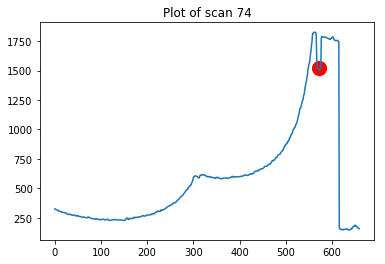

In [15]:
title("Plot of scan %d" % scan_no)
cylinders = find_cylinders(scan, der, depth_jump, minimum_valid_distance)
plot(scan)
scatter([c[0] for c in cylinders], [c[1] for c in cylinders],c='r', s=200)
show()

In [22]:
scan_no = 8
scan = logfile.scan_data[scan_no]

In [23]:
der = compute_derivative(scan, minimum_valid_distance)

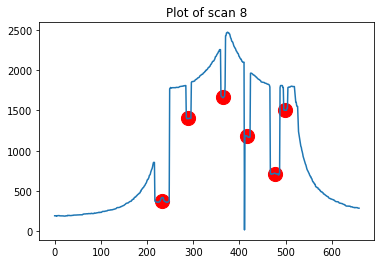

In [24]:
title("Plot of scan %d" % scan_no)
cylinders = find_cylinders(scan, der, depth_jump, minimum_valid_distance)
plot(scan)
scatter([c[0] for c in cylinders], [c[1] for c in cylinders],c='r', s=200)
show()

In [198]:
scan_no = 235
scan = logfile.scan_data[scan_no]

In [199]:
der = compute_derivative(scan, minimum_valid_distance)

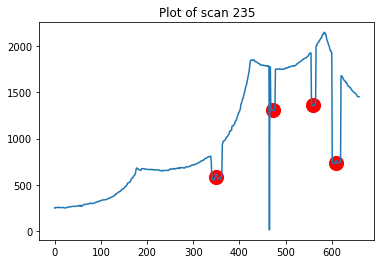

In [200]:
title("Plot of scan %d" % scan_no)
cylinders = find_cylinders(scan, der, depth_jump, minimum_valid_distance)
plot(scan)
scatter([c[0] for c in cylinders], [c[1] for c in cylinders],c='r', s=200)
show()

In [201]:
minimum_valid_distance = 25.0
depth_jump = 100.0
scan_no = 123
scan = logfile.scan_data[scan_no]

In [202]:
der = compute_derivative(scan, minimum_valid_distance)

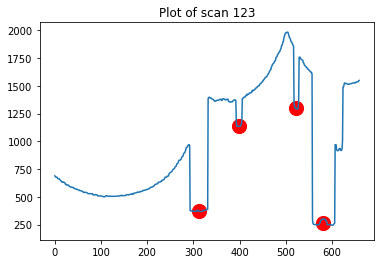

In [203]:
title("Plot of scan %d" % scan_no)
cylinders = find_cylinders(scan, der, depth_jump, minimum_valid_distance)
plot(scan)
scatter([c[0] for c in cylinders], [c[1] for c in cylinders],c='r', s=200)
show()